In [15]:
%reload_ext autoreload
%autoreload 2

In [39]:
import scipy.io
import numpy as np
from utils import get_attr_dataloader,get_reid_dataloader,show_grid,get_infinite_loader,get_infinite_zip_loader
from decoder.pos_emb import PositionEmbeddingSine

import torch
import torchvision.utils as vutils


In [17]:
train_attr = get_attr_dataloader(annotation_path="../../projectcv/pa-100k/annotation/annotation.mat",image_folder="../../projectcv/pa-100k/release_data/",split = "Train",batch_size =2)

In [18]:
image,label = next(iter(train_attr))

In [19]:
image.shape

torch.Size([2, 3, 276, 212])

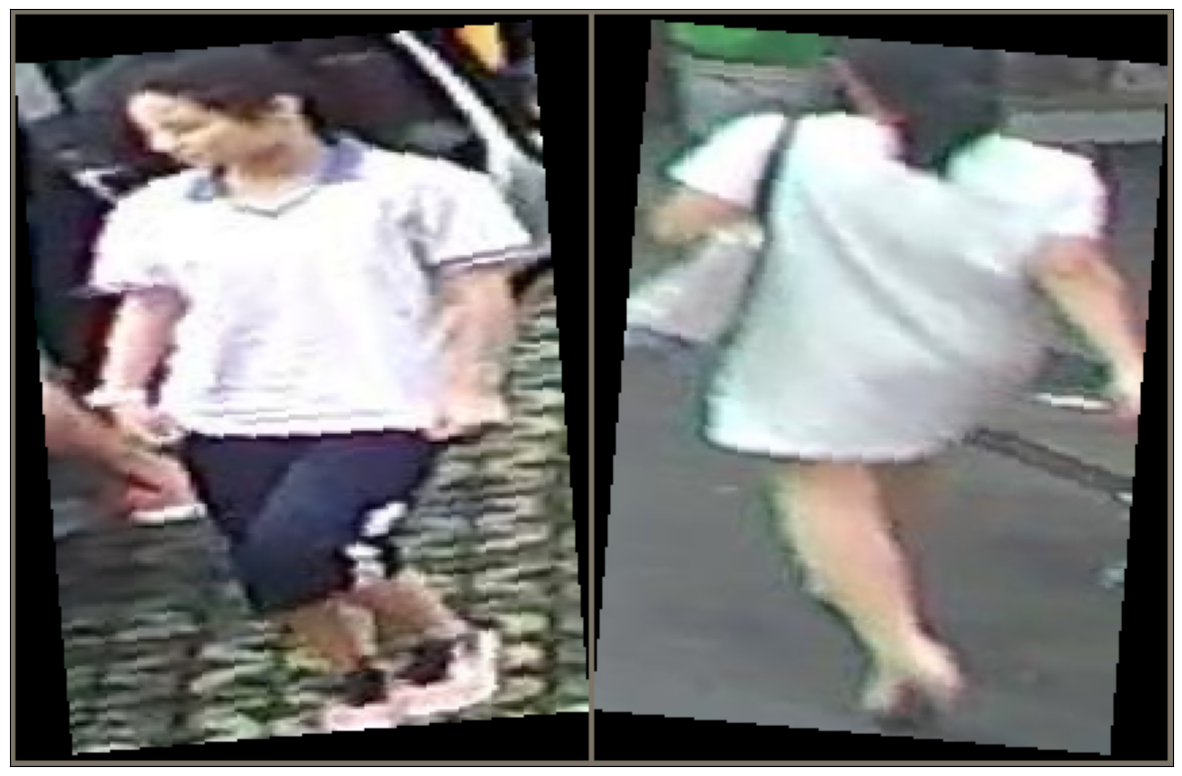

In [20]:
grid = vutils.make_grid(image,nrow =4//2)
show_grid(grid)

In [21]:
# Market 1501
root_dir='../../projectcv/Market-1501'

In [22]:
train_dl,val_dl = get_reid_dataloader(root_dir,batch_size =2)

# Now, you can use this dataloader to train a model with triplet loss


In [23]:
a,p,n = next(iter(train_dl))

In [24]:
a.shape

torch.Size([2, 3, 276, 212])

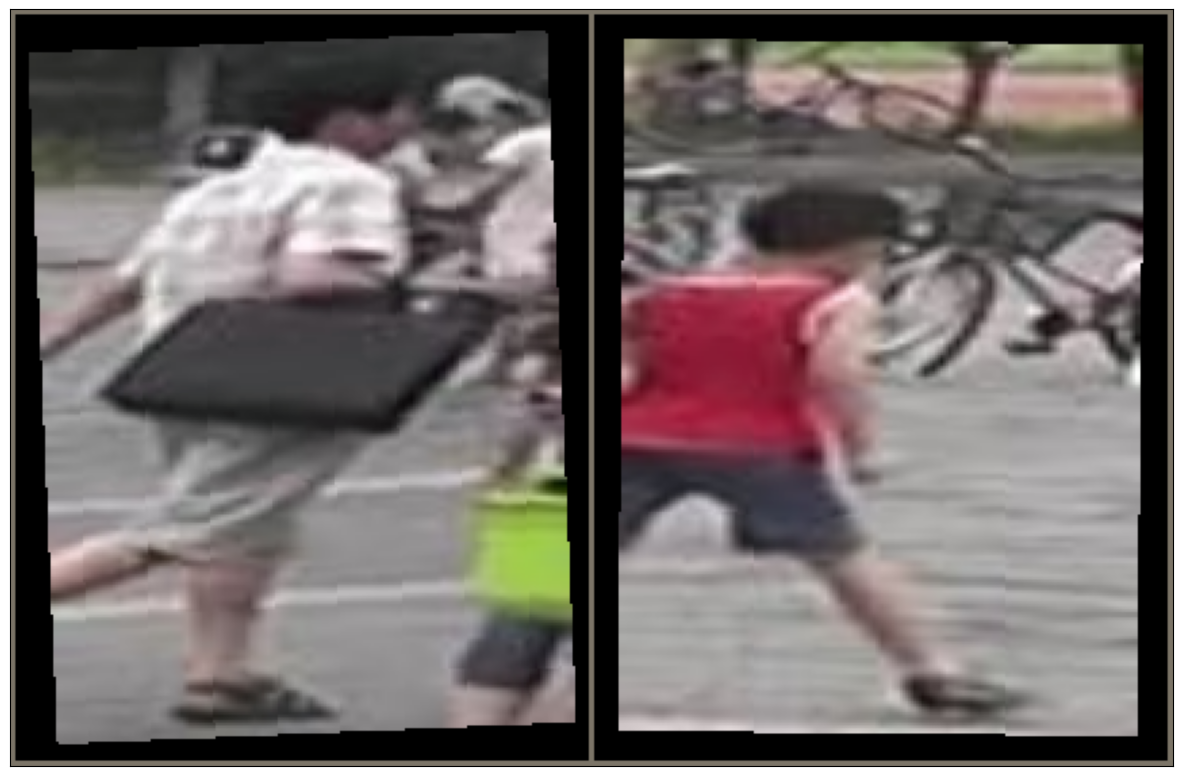

In [25]:
grid = vutils.make_grid(a,nrow =4//2)
show_grid(grid)

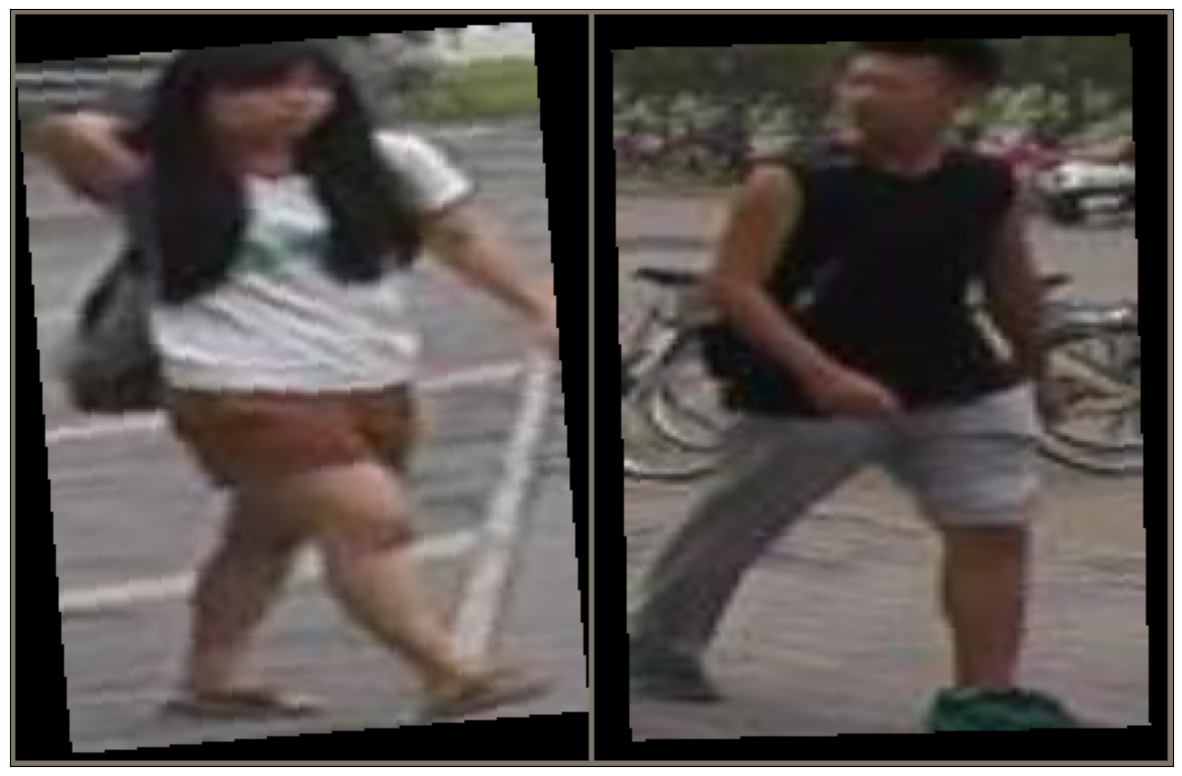

In [26]:
grid = vutils.make_grid(n,nrow =4//2)
show_grid(grid)

In [40]:
train_attr = get_infinite_loader(train_attr)
train_dl = get_infinite_loader(train_dl)
cdl = get_infinite_zip_loader(train_attr,train_dl)

In [47]:
batch= next(cdl)

In [48]:
images,labels = batch[0]

In [49]:
images.shape

torch.Size([2, 3, 276, 212])

In [50]:
a,p,n = batch[1]

In [51]:
a.shape

torch.Size([2, 3, 276, 212])